# Model Testing and Inference

In [1]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import itertools, pickle

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [3]:
! ls

BalanceNet-1.0.ipynb      Setup.ipynb               images
BalanceNet.h5             _config.yml               raw_data
ClassMerge.ipynb          architectures             run_tensorboard.sh
Evaluation.ipynb          checkpoint-0.90.h5        sklearn_experiments
ExtraFunctions.ipynb      checkpoint-0.91.h5        test_env.py
ProcessData-Crawled.ipynb data.csv                  tokenizer.pickle
ProcessData.ipynb         dataset                   twitter_crawl.py
README.md                 experiments


In [5]:
classes = ["neutral", "happy", "sad", "hate","anger"]
model_test = load_model('checkpoint-0.91.h5')
model_test.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 200)      6872000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 30, 200)      6872000     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 30, 12)       9936        embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectio

In [6]:
Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model_test.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)

print(classification_report(Y_test, y_pred_class, target_names=classes))
# precision = true_pos / (true_pos + false_pos)
# recall = true_pos / (true_pos + false_neg)

             precision    recall  f1-score   support

    neutral       0.52      0.40      0.45      1929
      happy       0.67      0.76      0.71      3272
        sad       0.65      0.69      0.67      3217
       hate       0.86      0.73      0.79       833
      anger       0.92      0.72      0.81       206

avg / total       0.66      0.66      0.65      9457



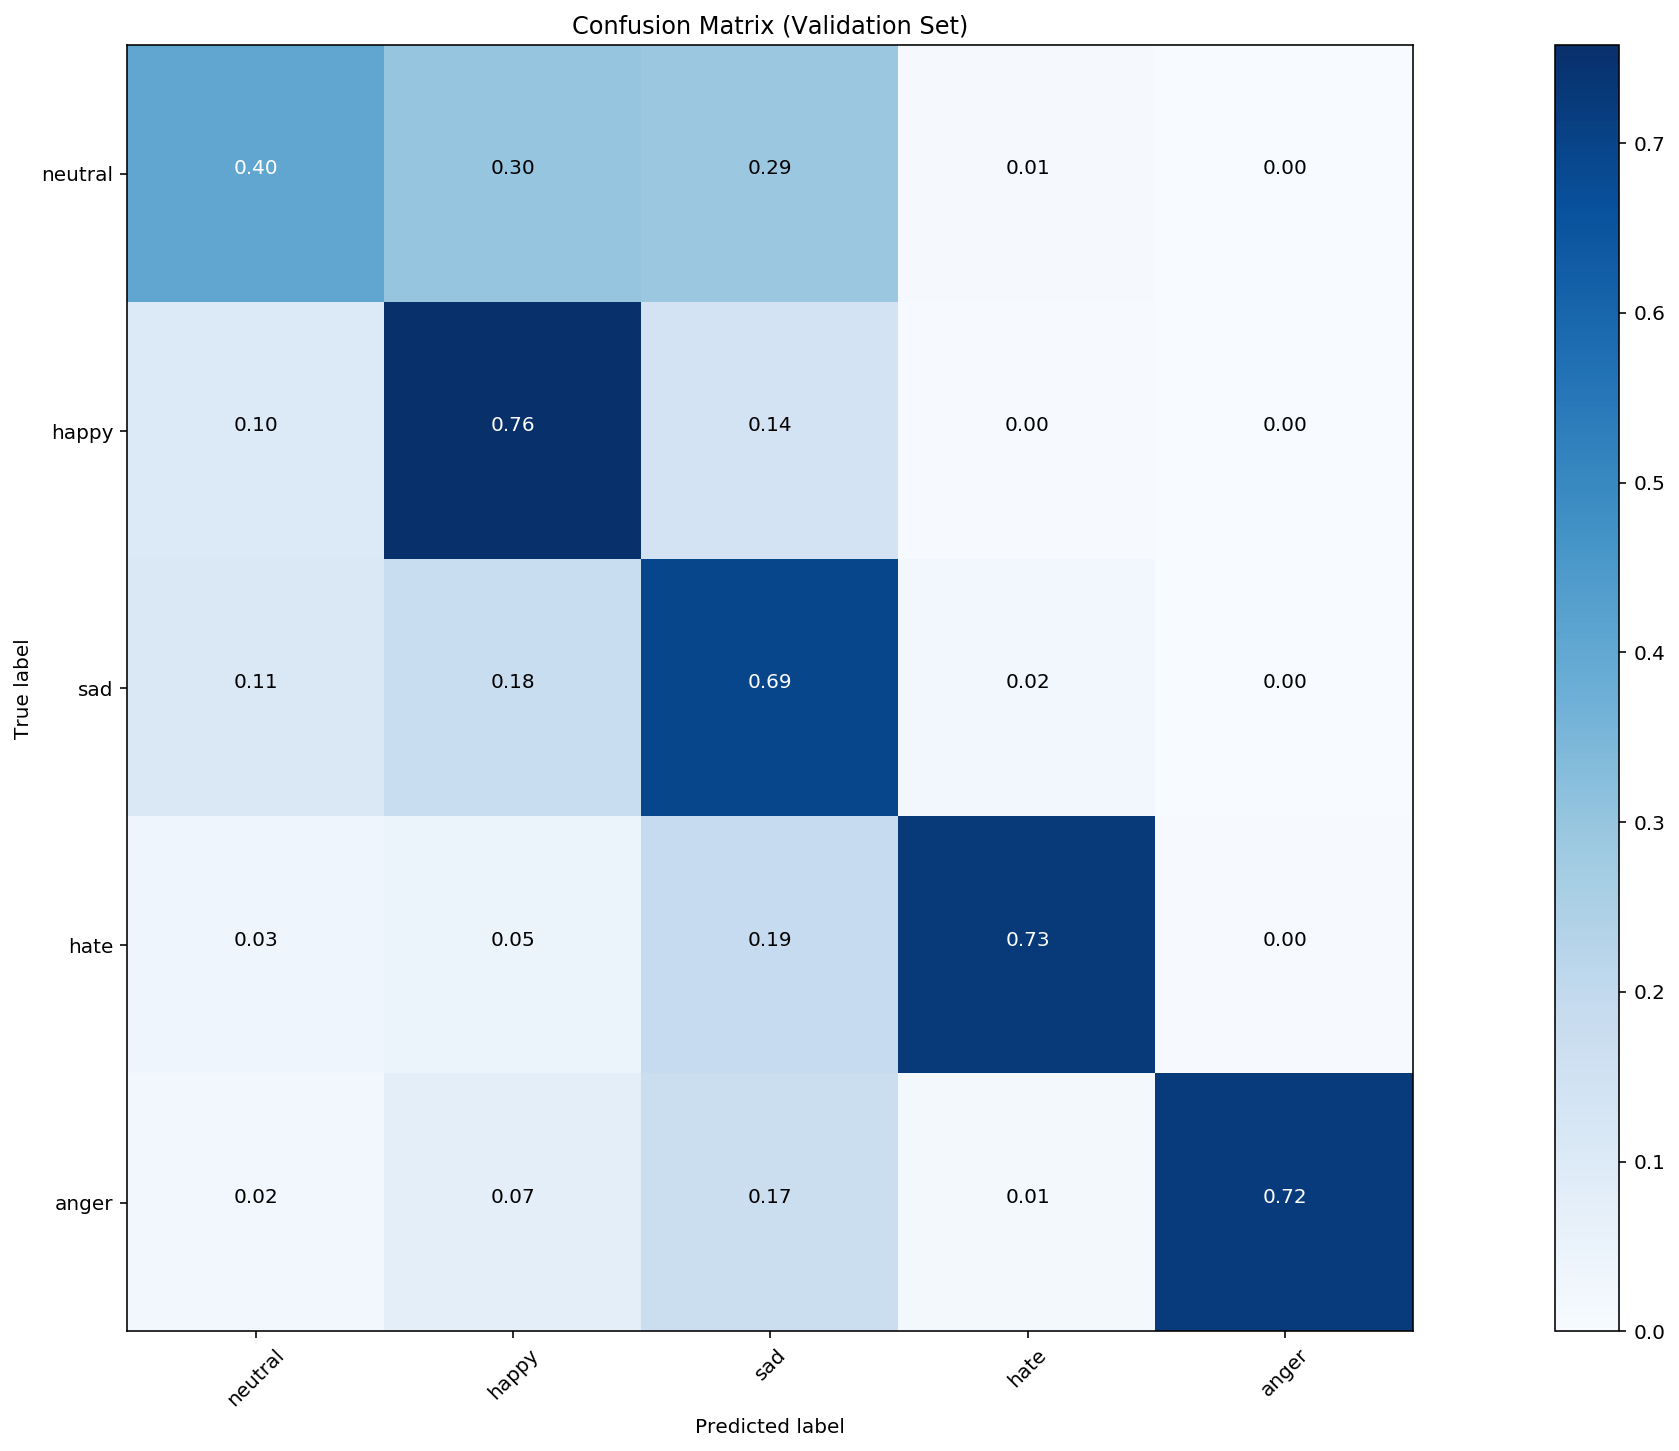

In [7]:
def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)

In [8]:
text = ["I salute you for the bravery and sacrifice! A true hero indeed."]

sequences_test = tokenizer.texts_to_sequences(text)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
y_prob = model_test.predict(data_test)
for n, prediction in enumerate(y_prob):
    pred = y_prob.argmax(axis=-1)[n]
    print(text[n],"\nPrediction:",classes[pred],"\n")

I salute you for the bravery and sacrifice! A true hero indeed. 
Prediction: happy 



In [37]:
for layer in model.layers:
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=layer.output)
    intermediate_output = intermediate_layer_model.predict(data_test)
    print("===== Layer name:", layer.name,"=====")
    print(" Tensor:\n", intermediate_output)
    print(" With shape:", intermediate_output.shape)
    print("=====\n")

===== Layer name: input_1 =====
 Tensor:
 [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1 6097    5   12    3    6 4841    4  515 1476 1238    0    0    0
     0    0]]
 With shape: (1, 30)
=====

===== Layer name: embedding_1 =====
 Tensor:
 [[[0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]
  [0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]
  [0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]
  ...
  [0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]
  [0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]
  [0.42834136 0.31308484 0.17665115 ... 0.12682104 0.4330583  0.4869212 ]]]
 With shape: (1, 30, 200)
=====

===== Layer name: embedding_2 =====
 Tensor:
 [[[0.8866637  0.76748526 0.58689487 ... 0.8369712  0.06882387 0.8001845 ]
  [0.8866637  0.76748526 0.58689487 ... 0.8369712  0.06882387 0.8001845 ]
  [0.8866637  0.76748526 0.58689487 ... 0.83697

===== Layer name: concatenate_1 =====
 Tensor:
 [[[ 8.06344077e-02  0.00000000e+00  0.00000000e+00  1.72238961e-01
    2.13927388e-01  0.00000000e+00 -1.32527430e-05 -2.44858768e-02
    2.49378700e-02 -9.10880626e-05  0.00000000e+00  1.62190315e-06]
  [ 9.80563536e-02  0.00000000e+00  0.00000000e+00  2.35380769e-01
    3.01944345e-01  0.00000000e+00 -2.48366414e-05 -2.44196467e-02
    2.89880596e-02 -1.35839160e-04  0.00000000e+00  3.31250180e-06]
  [ 1.02498040e-01  0.00000000e+00  0.00000000e+00  2.58635610e-01
    3.38359773e-01  0.00000000e+00 -4.65494886e-05 -2.43376140e-02
    3.36870402e-02 -2.02609226e-04  0.00000000e+00  6.76732543e-06]
  [ 1.03645623e-01  0.00000000e+00  0.00000000e+00  2.67821968e-01
    3.55138302e-01  0.00000000e+00 -8.72518358e-05 -2.42327508e-02
    3.91345285e-02 -3.02256813e-04  0.00000000e+00  1.38301666e-05]
  [ 1.03873923e-01  0.00000000e+00  0.00000000e+00  2.71617025e-01
    3.63474816e-01  0.00000000e+00 -1.63558012e-04 -2.40929723e-02
    4.5443

===== Layer name: conv1d_6 =====
 Tensor:
 [[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.  

===== Layer name: conv1d_9 =====
 Tensor:
 [[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.  

===== Layer name: conv1d_4 =====
 Tensor:
 [[[0.         0.         0.01488668 ... 0.11768723 0.         0.        ]
  [0.         0.         0.00893885 ... 0.12334982 0.         0.        ]
  [0.         0.         0.00739821 ... 0.12669875 0.         0.        ]
  ...
  [0.         0.         0.10555197 ... 0.1484237  0.08113632 0.2906651 ]
  [0.         0.         0.15426609 ... 0.10488616 0.         0.14050426]
  [0.         0.         0.06729852 ... 0.04035728 0.02787158 0.07842058]]]
 With shape: (1, 55, 24)
=====

===== Layer name: conv1d_3 =====
 Tensor:
 [[[0.13580194 0.         0.         ... 0.         0.         0.        ]
  [0.14834824 0.         0.         ... 0.         0.         0.        ]
  [0.15401895 0.         0.         ... 0.         0.         0.        ]
  ...
  [0.00904913 0.         0.         ... 0.         0.         0.        ]
  [0.02382381 0.         0.         ... 0.         0.         0.        ]
  [0.0362304  0.         0.         ... 0.04099526 0. 

===== Layer name: dropout_8 =====
 Tensor:
 [[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.00000

===== Layer name: dropout_10 =====
 Tensor:
 [[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.

===== Layer name: dropout_3 =====
 Tensor:
 [[[0.13580194 0.         0.         ... 0.         0.         0.        ]
  [0.14834824 0.         0.         ... 0.         0.         0.        ]
  [0.15401895 0.         0.         ... 0.         0.         0.        ]
  ...
  [0.00904913 0.         0.         ... 0.         0.         0.        ]
  [0.02382381 0.         0.         ... 0.         0.         0.        ]
  [0.0362304  0.         0.         ... 0.04099526 0.         0.        ]]]
 With shape: (1, 56, 24)
=====

===== Layer name: dropout_5 =====
 Tensor:
 [[[0.03583293 0.03248087 0.03508725 ... 0.         0.00884241 0.        ]
  [0.04644332 0.05146931 0.04433737 ... 0.         0.00522665 0.        ]
  [0.05054507 0.06098313 0.04609824 ... 0.         0.00446247 0.        ]
  ...
  [0.         0.0360718  0.         ... 0.         0.         0.        ]
  [0.         0.         0.00562662 ... 0.         0.         0.        ]
  [0.00151874 0.         0.         ... 0.         0